# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [5]:
df.insert(loc = 7,column ='Energy',value=df['Capacity']*df["Potential"])

In [7]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Energy
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
 7   Energy            242885 non-null  float64
dtypes: float64(8)
memory usage: 14.8 MB


In [9]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Charge              0
Capacity            0
Nominal_Capacity    0
SOC                 0
Energy              0
dtype: int64

In [10]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Energy
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,0.564913,5.702908
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,0.353788,3.763641
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,0.212000,1.895000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,0.644000,6.181200
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,0.920000,9.660000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,0.964000,10.122000


# Normalizing the Values 

In [11]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge', 'Capacity','SOC','Energy'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [13]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC,Energy
0,0.000000,0.544828,0.99734,0.000000,0.0,2.5,0.0,0.0
1,0.000002,0.544828,0.99734,0.000109,0.0,2.5,0.0,0.0
2,0.000006,0.544828,0.99734,0.000263,0.0,2.5,0.0,0.0
3,0.000010,0.551724,0.99734,0.000399,0.0,2.5,0.0,0.0
4,0.000014,0.551724,0.99734,0.000535,0.0,2.5,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
 7   Energy            242885 non-null  float64
dtypes: float64(8)
memory usage: 14.8 MB


# Spliting the Data into train and test

In [15]:
Y = df.pop('Energy')
X = df

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [17]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 7), (48577, 7), (194308,), (48577,))

In [18]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [19]:
%%time
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1,'linear')])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_1 = model_1.fit(X_train,Y_train, epochs= 200,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/200
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0078 - rmse: 0.0442 - mae: 0.0078 - mse: 0.0020 - val_loss: 0.0022 - val_rmse: 0.0033 - val_mae: 0.0022 - val_mse: 1.0780e-05
Epoch 2/200
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0028 - rmse: 0.0037 - mae: 0.0028 - mse: 1.3668e-05 - val_loss: 0.0014 - val_rmse: 0.0022 - val_mae: 0.0014 - val_mse: 4.9744e-06
Epoch 3/200
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0020 - rmse: 0.0027 - mae: 0.0020 - mse: 7.1873e-06 - val_loss: 0.0015 - val_rmse: 0.0021 - val_mae: 0.0015 - val_mse: 4.4007e-06
Epoch 4/200
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0016 - rmse: 0.0021 - mae: 0.0016 - mse: 4.5527e-06 - val_loss: 0.0017 - val_rmse: 0.0021 - val_mae: 0.0017 - val_mse: 4.4699e-06
Epoch 5/200
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0014 - rmse: 0.0018 - mae: 0.0014 - mse: 3.4011e-06 - val_loss: 8.0293e-04 - val_rmse: 0.

6073/6073 [==============================] - 8s 1ms/step - loss: 5.3734e-04 - rmse: 7.8158e-04 - mae: 5.3734e-04 - mse: 6.1086e-07 - val_loss: 4.9244e-04 - val_rmse: 7.2841e-04 - val_mae: 4.9244e-04 - val_mse: 5.3057e-07
Epoch 38/200
6073/6073 [==============================] - 8s 1ms/step - loss: 5.3029e-04 - rmse: 7.7404e-04 - mae: 5.3029e-04 - mse: 5.9914e-07 - val_loss: 5.2540e-04 - val_rmse: 7.3154e-04 - val_mae: 5.2540e-04 - val_mse: 5.3516e-07
Epoch 39/200
6073/6073 [==============================] - 8s 1ms/step - loss: 5.2350e-04 - rmse: 7.6681e-04 - mae: 5.2350e-04 - mse: 5.8800e-07 - val_loss: 4.5303e-04 - val_rmse: 6.9788e-04 - val_mae: 4.5303e-04 - val_mse: 4.8704e-07
Epoch 40/200
6073/6073 [==============================] - 8s 1ms/step - loss: 5.2318e-04 - rmse: 7.6309e-04 - mae: 5.2318e-04 - mse: 5.8231e-07 - val_loss: 6.4444e-04 - val_rmse: 8.1112e-04 - val_mae: 6.4444e-04 - val_mse: 6.5791e-07
Epoch 41/200
6073/6073 [==============================] - 8s 1ms/step - loss:

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 889us/step - loss: 4.4800e-04 - rmse: 6.9283e-04 - mae: 4.4800e-04 - mse: 4.8001e-07


[0.00044800134492106736,
 0.0006928255315870047,
 0.00044800134492106736,
 4.800072019861545e-07]

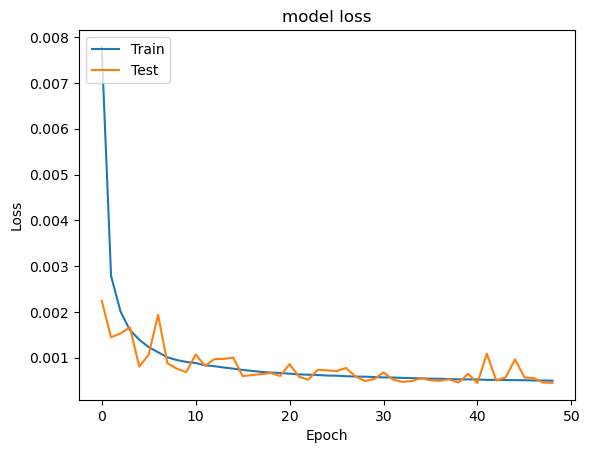

In [22]:
plot_his(history_1)

In [23]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 1s 745us/step
[[0.9336451 ]
 [0.97246075]
 [0.26411423]
 [0.9642756 ]
 [0.96431774]
 [0.54935074]
 [0.03257965]
 [0.41664758]
 [0.50444156]
 [0.31516233]]


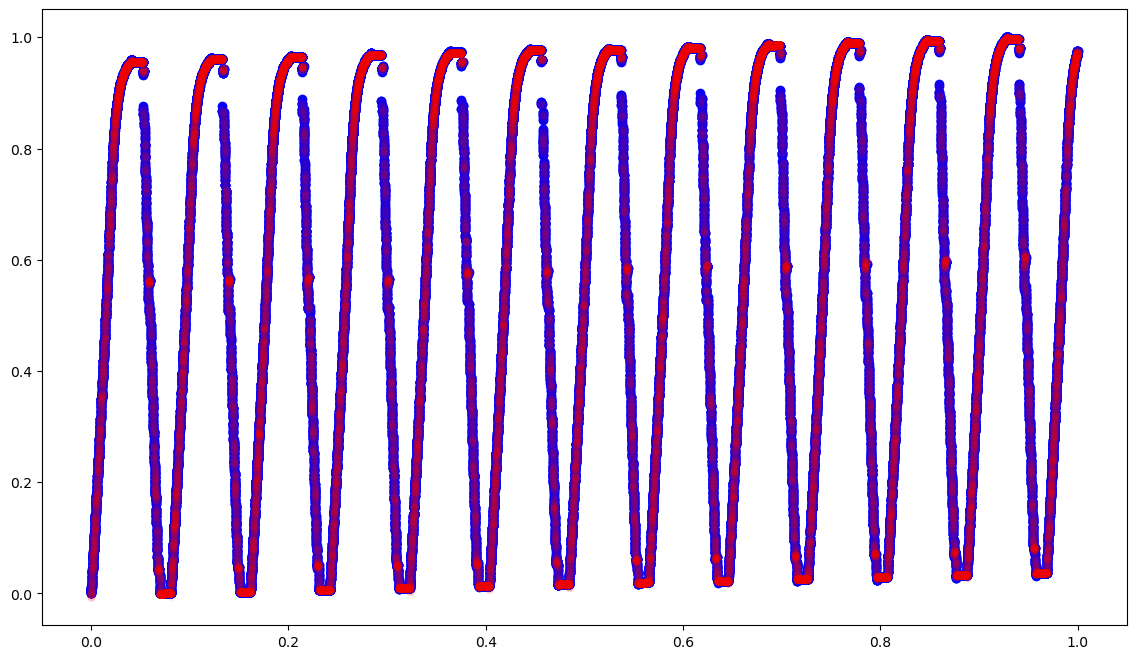

In [24]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction,color='red',alpha=0.05,linewidths=0.02)
plt.show()

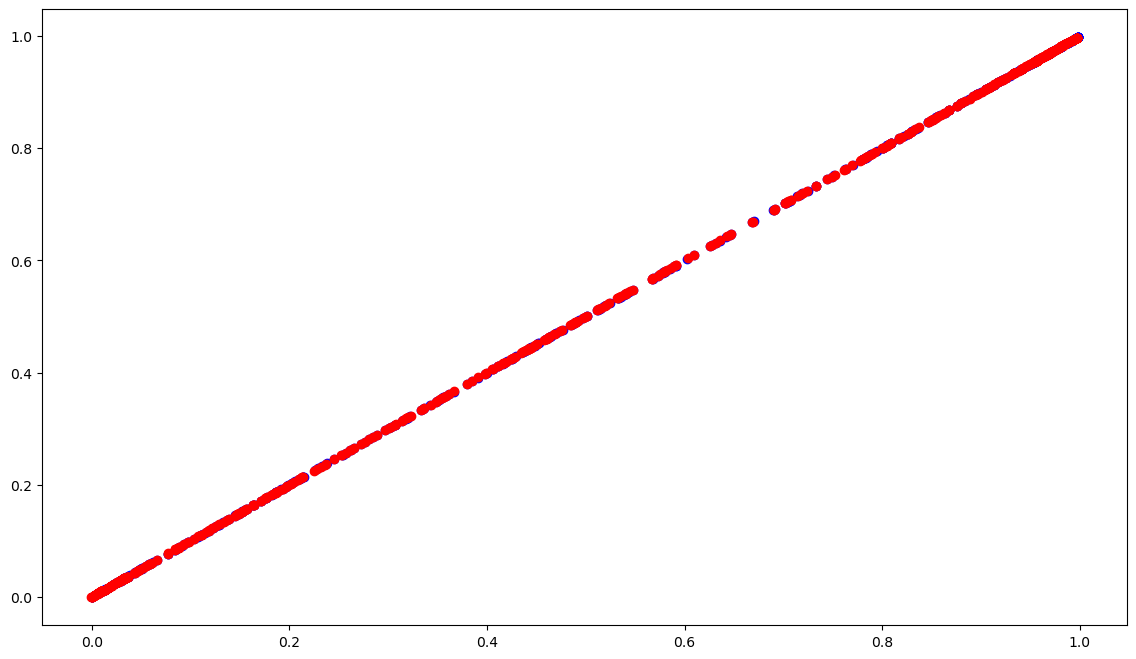

In [25]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model_1_1

In [26]:
tf.random.set_seed(42)

model__1_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(30, activation='linear'),
                                  tf.keras.layers.Dense(10, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_1.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_1 = model__1_1.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0014 - rmse: 0.0372 - mae: 0.0229 - mse: 0.0014 - val_loss: 5.6424e-04 - val_rmse: 0.0238 - val_mae: 0.0205 - val_mse: 5.6424e-04
Epoch 2/100
6073/6073 [==============================] - 9s 1ms/step - loss: 6.2186e-04 - rmse: 0.0249 - mae: 0.0211 - mse: 6.2186e-04 - val_loss: 8.2722e-04 - val_rmse: 0.0288 - val_mae: 0.0227 - val_mse: 8.2722e-04
Epoch 3/100
6073/6073 [==============================] - 9s 1ms/step - loss: 5.9750e-04 - rmse: 0.0244 - mae: 0.0209 - mse: 5.9750e-04 - val_loss: 5.7433e-04 - val_rmse: 0.0240 - val_mae: 0.0204 - val_mse: 5.7433e-04
Epoch 4/100
6073/6073 [==============================] - 9s 1ms/step - loss: 5.8258e-04 - rmse: 0.0241 - mae: 0.0207 - mse: 5.8258e-04 - val_loss: 5.8240e-04 - val_rmse: 0.0241 - val_mae: 0.0222 - val_mse: 5.8240e-04
Epoch 5/100
6073/6073 [==============================] - 9s 1ms/step - loss: 5.7860e-04 - rmse: 0.0241 - mae: 0.0207 - mse: 5.7860e-04 - val

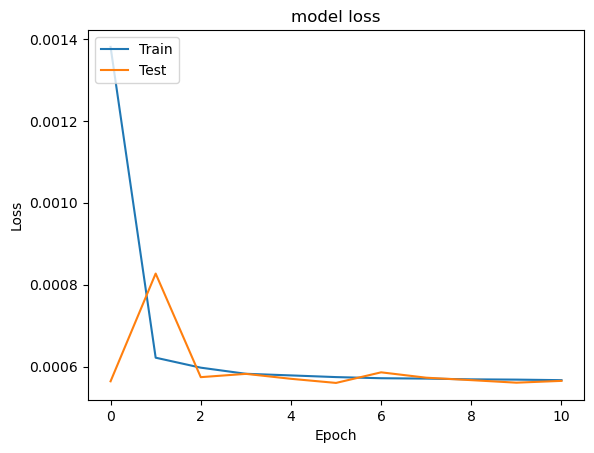

In [27]:
plot_his(history_1_1)

In [28]:
prediction_1_1 = model__1_1.predict(X_test)
print(prediction_1_1[:10])

1519/1519 [==============================] - 1s 747us/step
[[9.2520118e-01]
 [9.6167701e-01]
 [2.7526465e-01]
 [9.5375568e-01]
 [9.5379561e-01]
 [5.9462821e-01]
 [3.2907538e-04]
 [4.4224471e-01]
 [5.2742565e-01]
 [3.3428332e-01]]


In [82]:
model__1_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 983us/step - loss: 5.6526e-04 - rmse: 0.0238 - mae: 0.0197 - mse: 5.6526e-04


[0.0005652647814713418,
 0.02377529814839363,
 0.019719885662198067,
 0.0005652647814713418]

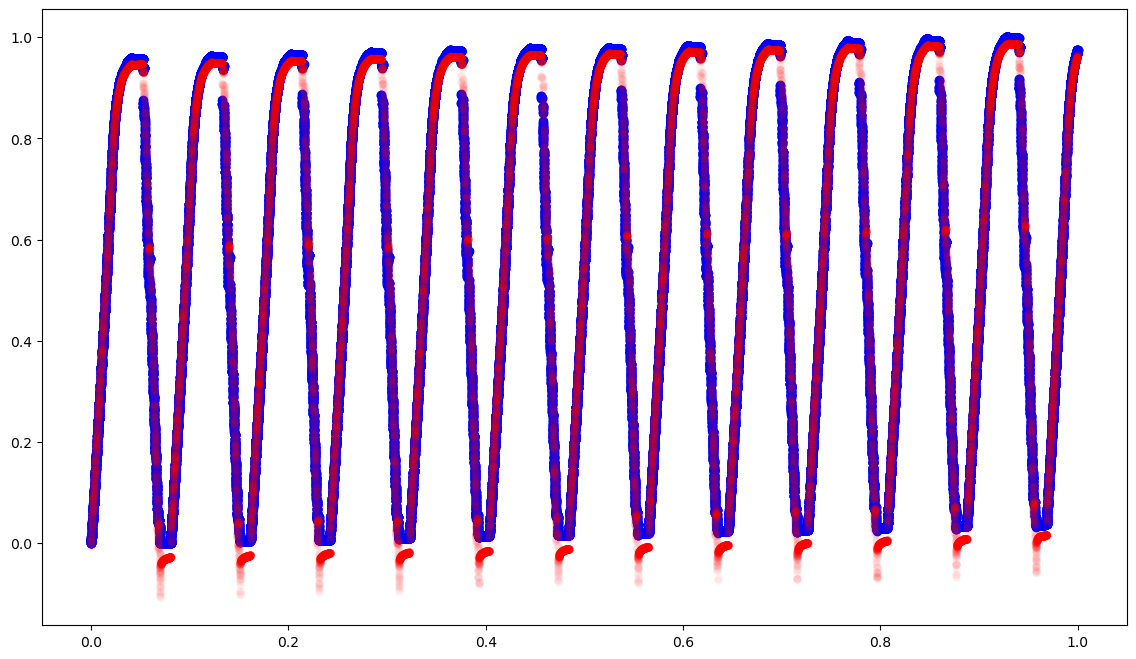

In [29]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_1_1,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [30]:
%%time
tf.random.set_seed(42)

model__1_2 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(20, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_2.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_2 = model__1_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0019 - rmse: 0.0441 - mae: 0.0242 - mse: 0.0019 - val_loss: 7.1512e-04 - val_rmse: 0.0267 - val_mae: 0.0236 - val_mse: 7.1512e-04
Epoch 2/100
6073/6073 [==============================] - 8s 1ms/step - loss: 6.5582e-04 - rmse: 0.0256 - mae: 0.0216 - mse: 6.5582e-04 - val_loss: 6.9980e-04 - val_rmse: 0.0265 - val_mae: 0.0198 - val_mse: 6.9980e-04
Epoch 3/100
6073/6073 [==============================] - 8s 1ms/step - loss: 6.1639e-04 - rmse: 0.0248 - mae: 0.0211 - mse: 6.1639e-04 - val_loss: 6.2380e-04 - val_rmse: 0.0250 - val_mae: 0.0204 - val_mse: 6.2380e-04
Epoch 4/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.9625e-04 - rmse: 0.0244 - mae: 0.0209 - mse: 5.9625e-04 - val_loss: 6.7486e-04 - val_rmse: 0.0260 - val_mae: 0.0243 - val_mse: 6.7486e-04
Epoch 5/100
6073/6073 [==============================] - 8s 1ms/step - loss: 5.8940e-04 - rmse: 0.0243 - mae: 0.0208 - mse: 5.8940e-04 - val

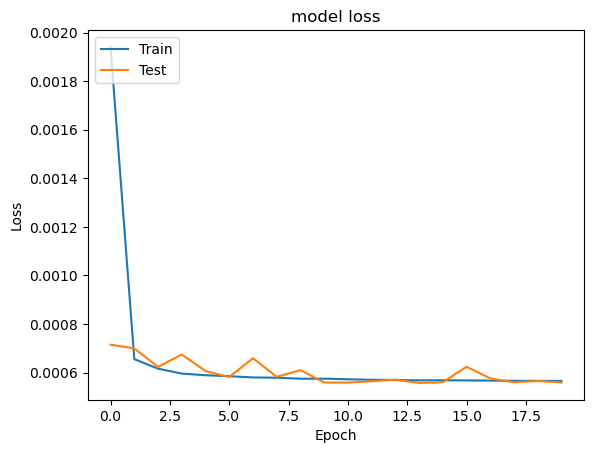

In [31]:
plot_his(history_1_2)

In [84]:
model__1_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 986us/step - loss: 5.5954e-04 - rmse: 0.0237 - mae: 0.0205 - mse: 5.5954e-04


[0.0005595418624579906,
 0.0236546378582716,
 0.02050883322954178,
 0.0005595418624579906]

# LSTM
LSTM ( Long short term memory)


## Model 2

In [32]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_2 = model_2.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/30
6073/6073 [==============================] - 34s 5ms/step - loss: 0.0116 - rmse: 0.0398 - mae: 0.0116 - mse: 0.0016 - val_loss: 0.0094 - val_rmse: 0.0101 - val_mae: 0.0094 - val_mse: 1.0170e-04
Epoch 2/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0033 - rmse: 0.0046 - mae: 0.0033 - mse: 2.0717e-05 - val_loss: 0.0014 - val_rmse: 0.0023 - val_mae: 0.0014 - val_mse: 5.2084e-06
Epoch 3/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0023 - rmse: 0.0032 - mae: 0.0023 - mse: 1.0368e-05 - val_loss: 0.0071 - val_rmse: 0.0076 - val_mae: 0.0071 - val_mse: 5.7288e-05
Epoch 4/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0019 - rmse: 0.0027 - mae: 0.0019 - mse: 7.1190e-06 - val_loss: 0.0014 - val_rmse: 0.0019 - val_mae: 0.0014 - val_mse: 3.6271e-06
Epoch 5/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0016 - rmse: 0.0022 - mae: 0.0016 - mse: 4.8439e-06 - val_loss: 8.4446e-04 - val_rmse: 0.

In [33]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 7.9534e-04 - rmse: 0.0011 - mae: 7.9534e-04 - mse: 1.1524e-06


[0.0007953350432217121,
 0.0010734936222434044,
 0.0007953350432217121,
 1.1523884495545644e-06]

In [34]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


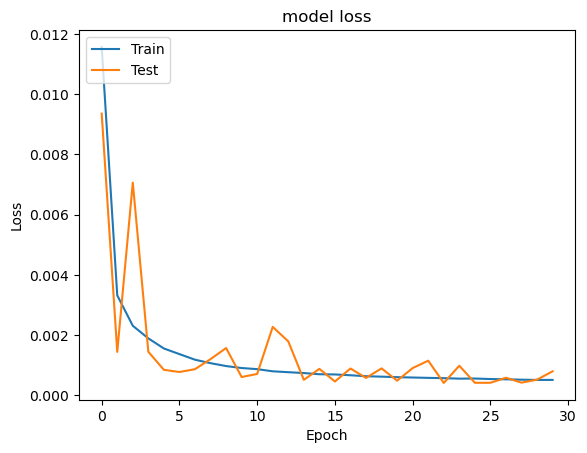

In [35]:
plot_his(history_2)

In [36]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 3s 2ms/step
[[0.93470573]
 [0.9736248 ]
 [0.26563495]
 [0.9651196 ]
 [0.96504855]
 [0.55061865]
 [0.03282377]
 [0.4181988 ]
 [0.5045918 ]
 [0.314967  ]
 [0.00688125]
 [0.74389935]
 [0.98228824]
 [0.00960925]
 [0.9601445 ]
 [0.95574784]
 [0.8846364 ]
 [0.97771585]
 [0.9184345 ]
 [0.95530057]]


In [37]:
# plt.figure(figsize=(10, 8))
# plt.title('Test set')
# plt.xlabel('Cycle')
# plt.ylabel('SOH (%)')
# plt.plot(X_test['Time'],prediction_2,label='Prediction')
# plt.plot(X_test['Time'],Y_test,label='Actual')
# plt.legend()

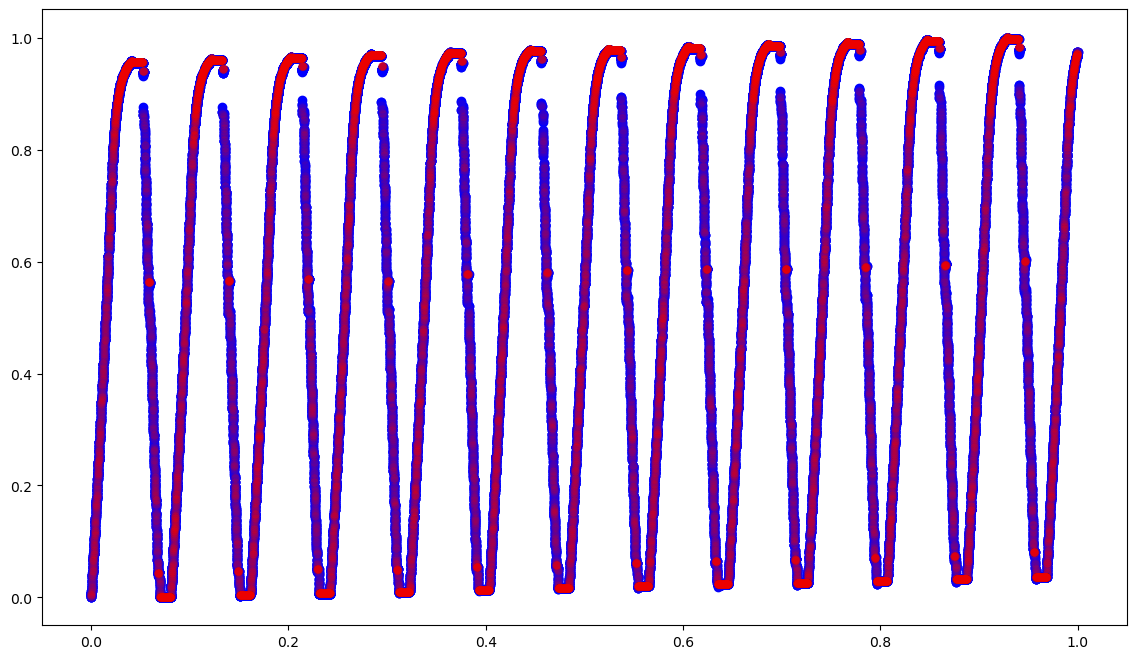

In [38]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_2,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 3
Best

In [39]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(7,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_3 = model_3.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 38s 6ms/step - loss: 0.0111 - rmse: 0.0423 - mae: 0.0111 - mse: 0.0018 - val_loss: 0.0038 - val_rmse: 0.0043 - val_mae: 0.0038 - val_mse: 1.8360e-05
Epoch 2/40
6073/6073 [==============================] - 37s 6ms/step - loss: 0.0038 - rmse: 0.0051 - mae: 0.0038 - mse: 2.5694e-05 - val_loss: 0.0024 - val_rmse: 0.0030 - val_mae: 0.0024 - val_mse: 8.8965e-06
Epoch 3/40
6073/6073 [==============================] - 37s 6ms/step - loss: 0.0025 - rmse: 0.0033 - mae: 0.0025 - mse: 1.1068e-05 - val_loss: 0.0016 - val_rmse: 0.0019 - val_mae: 0.0016 - val_mse: 3.7660e-06
Epoch 4/40
6073/6073 [==============================] - 37s 6ms/step - loss: 0.0020 - rmse: 0.0027 - mae: 0.0020 - mse: 7.3790e-06 - val_loss: 8.0694e-04 - val_rmse: 0.0012 - val_mae: 8.0694e-04 - val_mse: 1.5117e-06
Epoch 5/40
6073/6073 [==============================] - 37s 6ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 4.9787e-06 - val_loss: 0.0017 - val_rmse

6073/6073 [==============================] - 38s 6ms/step - loss: 4.0547e-04 - rmse: 7.2746e-04 - mae: 4.0547e-04 - mse: 5.2919e-07 - val_loss: 3.8008e-04 - val_rmse: 7.0649e-04 - val_mae: 3.8008e-04 - val_mse: 4.9913e-07
Epoch 38/40
6073/6073 [==============================] - 37s 6ms/step - loss: 4.0856e-04 - rmse: 7.3026e-04 - mae: 4.0856e-04 - mse: 5.3328e-07 - val_loss: 5.1794e-04 - val_rmse: 7.7164e-04 - val_mae: 5.1794e-04 - val_mse: 5.9543e-07
Epoch 39/40
6073/6073 [==============================] - 38s 6ms/step - loss: 4.0617e-04 - rmse: 7.2627e-04 - mae: 4.0617e-04 - mse: 5.2747e-07 - val_loss: 4.1707e-04 - val_rmse: 7.1025e-04 - val_mae: 4.1707e-04 - val_mse: 5.0446e-07
Epoch 40/40
6073/6073 [==============================] - 38s 6ms/step - loss: 3.9828e-04 - rmse: 7.2007e-04 - mae: 3.9828e-04 - mse: 5.1851e-07 - val_loss: 5.8447e-04 - val_rmse: 8.5671e-04 - val_mae: 5.8447e-04 - val_mse: 7.3396e-07
CPU times: total: 1h 21min 9s
Wall time: 40min 8s


In [40]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


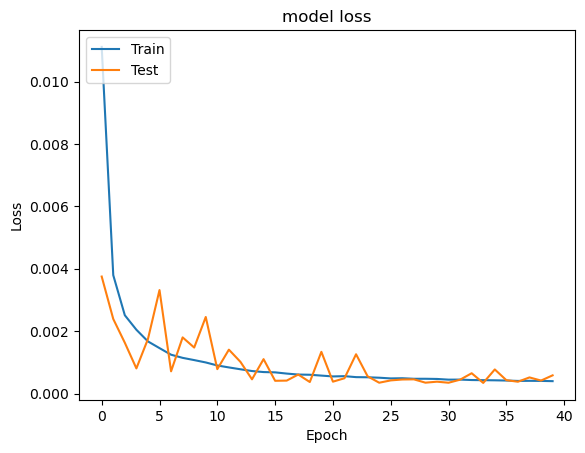

In [41]:
plot_his(history_3)

In [87]:
%%time
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 5s 3ms/step - loss: 5.8447e-04 - rmse: 8.5671e-04 - mae: 5.8447e-04 - mse: 7.3396e-07
CPU times: total: 10.3 s
Wall time: 4.57 s


[0.0005844716215506196,
 0.0008567137410864234,
 0.0005844716215506196,
 7.339584726651083e-07]

In [43]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 4s 2ms/step


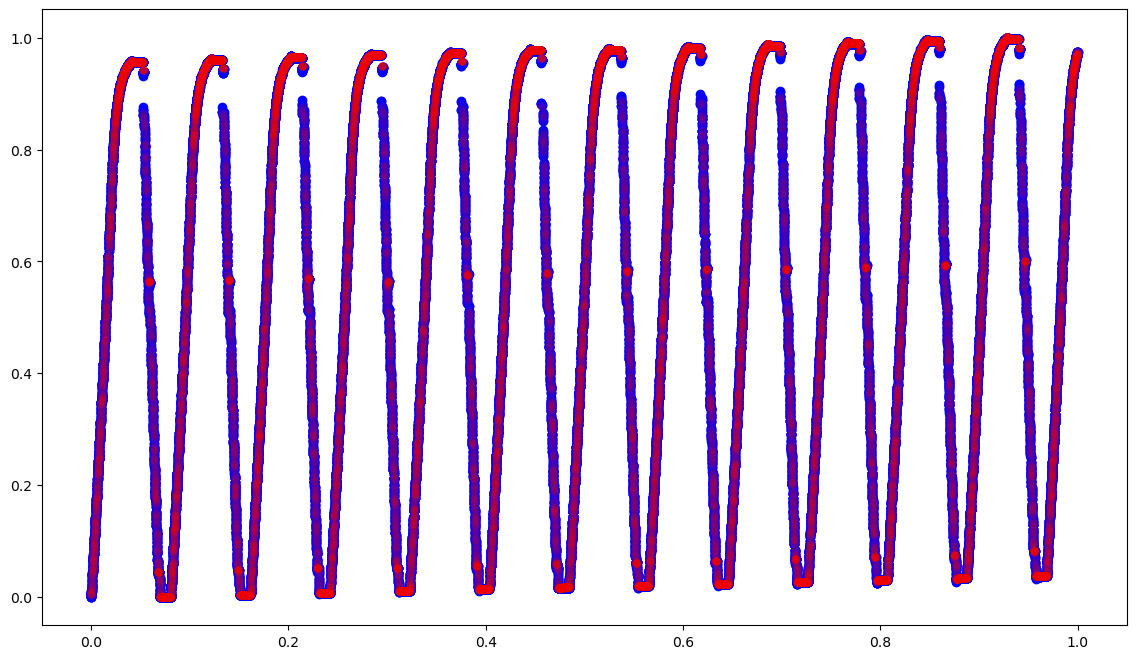

In [44]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_3,color='red',alpha=0.05,linewidths=0.02)
plt.show()

# CNN

## Model 4
CNN

In [45]:
%%time
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_4 = model_4.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0071 - rmse: 0.0420 - mae: 0.0071 - mse: 0.0018 - val_loss: 0.0050 - val_rmse: 0.0068 - val_mae: 0.0050 - val_mse: 4.6590e-05
Epoch 2/50
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0029 - rmse: 0.0053 - mae: 0.0029 - mse: 2.8299e-05 - val_loss: 0.0027 - val_rmse: 0.0052 - val_mae: 0.0027 - val_mse: 2.6563e-05
Epoch 3/50
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0027 - rmse: 0.0050 - mae: 0.0027 - mse: 2.5089e-05 - val_loss: 0.0042 - val_rmse: 0.0058 - val_mae: 0.0042 - val_mse: 3.3087e-05
Epoch 4/50
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0026 - rmse: 0.0048 - mae: 0.0026 - mse: 2.2613e-05 - val_loss: 0.0024 - val_rmse: 0.0046 - val_mae: 0.0024 - val_mse: 2.0914e-05
Epoch 5/50
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0025 - rmse: 0.0045 - mae: 0.0025 - mse: 2.0649e-05 - val_loss: 0.0024 - val_rmse: 0.0045 - v

Epoch 40/50
6073/6073 [==============================] - 9s 2ms/step - loss: 9.8492e-04 - rmse: 0.0020 - mae: 9.8492e-04 - mse: 3.8413e-06 - val_loss: 9.4495e-04 - val_rmse: 0.0019 - val_mae: 9.4495e-04 - val_mse: 3.6684e-06
Epoch 41/50
6073/6073 [==============================] - 9s 2ms/step - loss: 9.7922e-04 - rmse: 0.0020 - mae: 9.7922e-04 - mse: 3.8031e-06 - val_loss: 0.0011 - val_rmse: 0.0020 - val_mae: 0.0011 - val_mse: 3.9450e-06
Epoch 42/50
6073/6073 [==============================] - 9s 2ms/step - loss: 9.7731e-04 - rmse: 0.0019 - mae: 9.7731e-04 - mse: 3.7808e-06 - val_loss: 9.5706e-04 - val_rmse: 0.0019 - val_mae: 9.5706e-04 - val_mse: 3.5980e-06
Epoch 43/50
6073/6073 [==============================] - 10s 2ms/step - loss: 9.7173e-04 - rmse: 0.0019 - mae: 9.7173e-04 - mse: 3.7381e-06 - val_loss: 9.2822e-04 - val_rmse: 0.0019 - val_mae: 9.2822e-04 - val_mse: 3.5933e-06
Epoch 44/50
6073/6073 [==============================] - 9s 2ms/step - loss: 9.6971e-04 - rmse: 0.0019 - ma

In [46]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 959us/step - loss: 9.3649e-04 - rmse: 0.0019 - mae: 9.3649e-04 - mse: 3.4933e-06


[0.0009364902507513762,
 0.0018690256401896477,
 0.0009364902507513762,
 3.4932568269141484e-06]

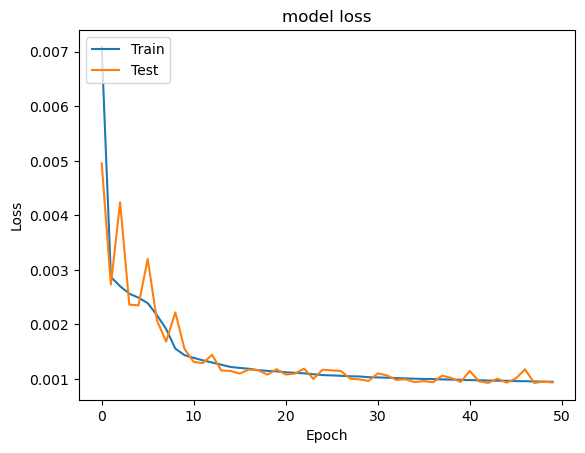

In [47]:
plot_his(history_4)

In [48]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 1s 762us/step


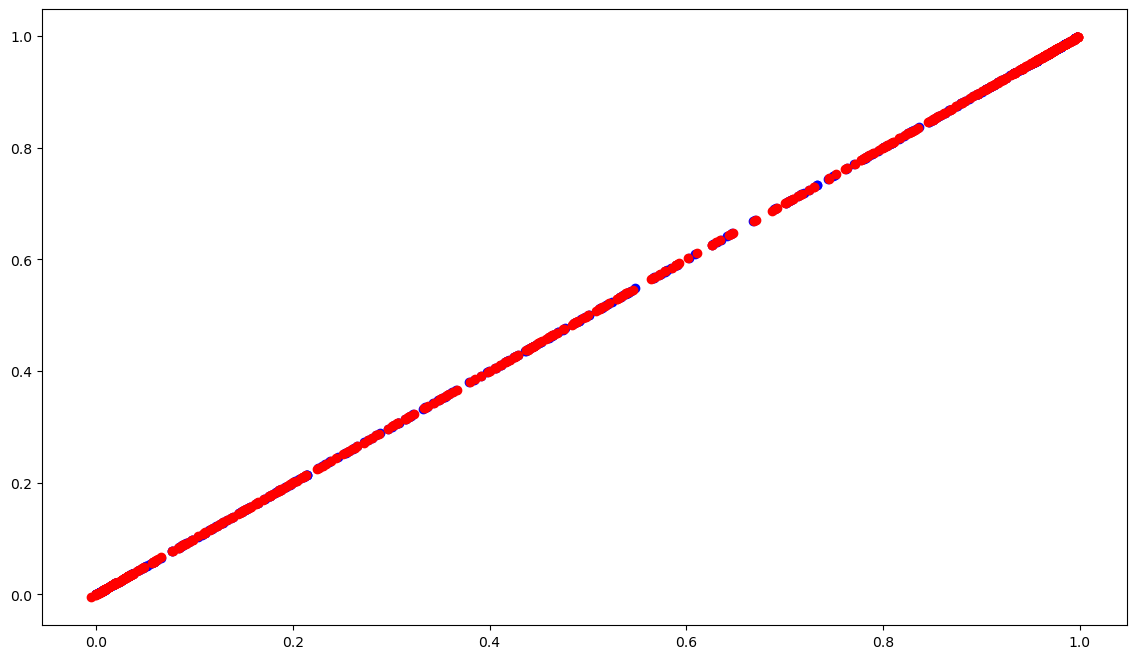

In [49]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

In [85]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 981us/step - loss: 9.3649e-04 - rmse: 0.0019 - mae: 9.3649e-04 - mse: 3.4933e-06


[0.0009364902507513762,
 0.0018690256401896477,
 0.0009364902507513762,
 3.4932568269141484e-06]

## Model 5 (Best)

In [50]:
%%time
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_5 = model_5.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0070 - rmse: 0.0305 - mae: 0.0070 - mse: 9.2748e-04 - val_loss: 0.0015 - val_rmse: 0.0029 - val_mae: 0.0015 - val_mse: 8.3881e-06
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0041 - mae: 0.0029 - mse: 1.6527e-05 - val_loss: 0.0045 - val_rmse: 0.0051 - val_mae: 0.0045 - val_mse: 2.5976e-05
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0021 - rmse: 0.0030 - mae: 0.0021 - mse: 8.9653e-06 - val_loss: 0.0015 - val_rmse: 0.0024 - val_mae: 0.0015 - val_mse: 5.7520e-06
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0017 - rmse: 0.0025 - mae: 0.0017 - mse: 6.0886e-06 - val_loss: 0.0012 - val_rmse: 0.0019 - val_mae: 0.0012 - val_mse: 3.7829e-06
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0014 - rmse: 0.0021 - mae: 0.0014 - mse: 4.2287e-06 - val_loss: 9.9420e-04 - val

Epoch 37/100
6073/6073 [==============================] - 10s 2ms/step - loss: 3.9848e-04 - rmse: 6.1974e-04 - mae: 3.9848e-04 - mse: 3.8407e-07 - val_loss: 3.2003e-04 - val_rmse: 5.6727e-04 - val_mae: 3.2003e-04 - val_mse: 3.2180e-07
Epoch 38/100
6073/6073 [==============================] - 10s 2ms/step - loss: 3.9214e-04 - rmse: 6.1031e-04 - mae: 3.9214e-04 - mse: 3.7248e-07 - val_loss: 3.6654e-04 - val_rmse: 6.0342e-04 - val_mae: 3.6654e-04 - val_mse: 3.6412e-07
Epoch 39/100
6073/6073 [==============================] - 10s 2ms/step - loss: 3.9364e-04 - rmse: 6.1142e-04 - mae: 3.9364e-04 - mse: 3.7384e-07 - val_loss: 4.1143e-04 - val_rmse: 6.2853e-04 - val_mae: 4.1143e-04 - val_mse: 3.9505e-07
Epoch 40/100
6073/6073 [==============================] - 11s 2ms/step - loss: 3.8589e-04 - rmse: 6.0346e-04 - mae: 3.8589e-04 - mse: 3.6417e-07 - val_loss: 3.4122e-04 - val_rmse: 5.6843e-04 - val_mae: 3.4122e-04 - val_mse: 3.2312e-07
Epoch 41/100
6073/6073 [==============================] - 10

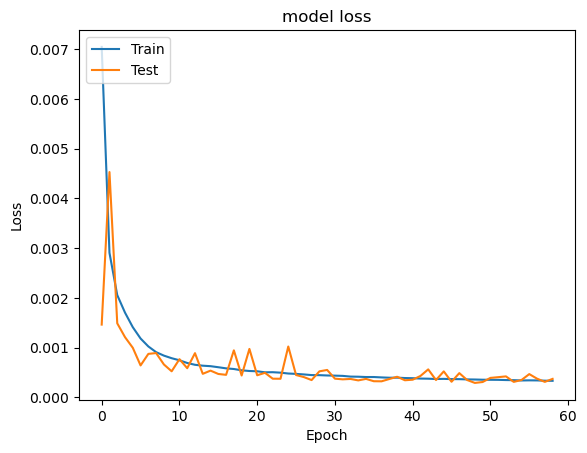

In [51]:
plot_his(history_5)

In [52]:
model_5.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 3.6894e-04 - rmse: 5.6235e-04 - mae: 3.6894e-04 - mse: 3.1624e-07


[0.0003689388686325401,
 0.0005623526521958411,
 0.0003689388686325401,
 3.162405164403026e-07]

In [53]:
prediction_5 = model_5.predict(X_test)

1519/1519 [==============================] - 1s 797us/step


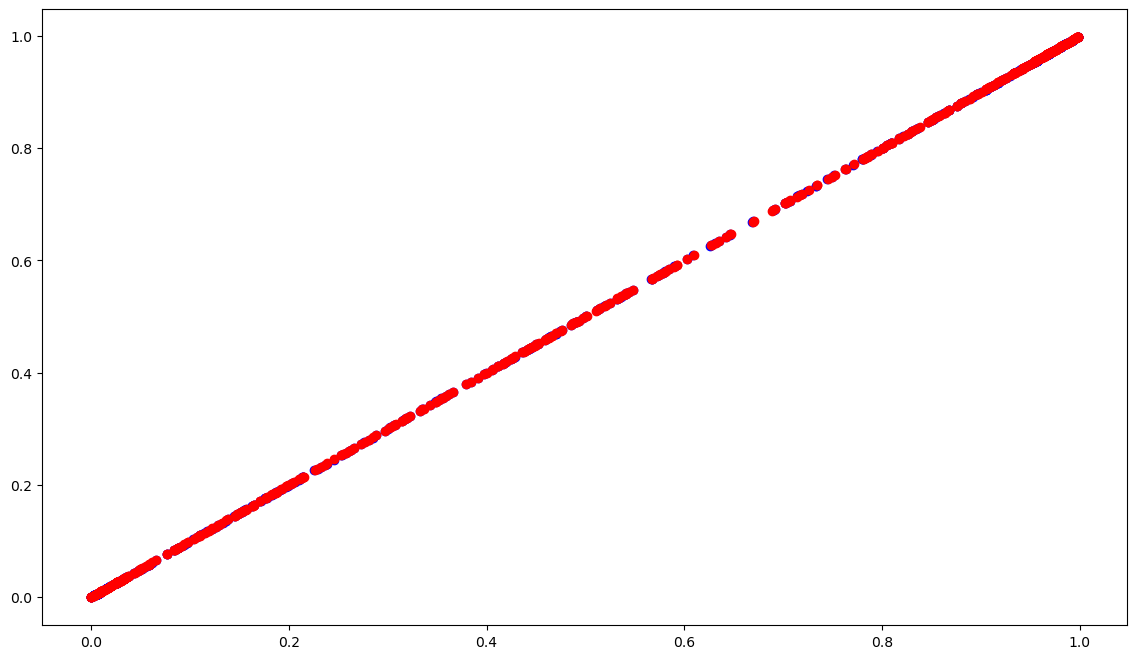

In [54]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

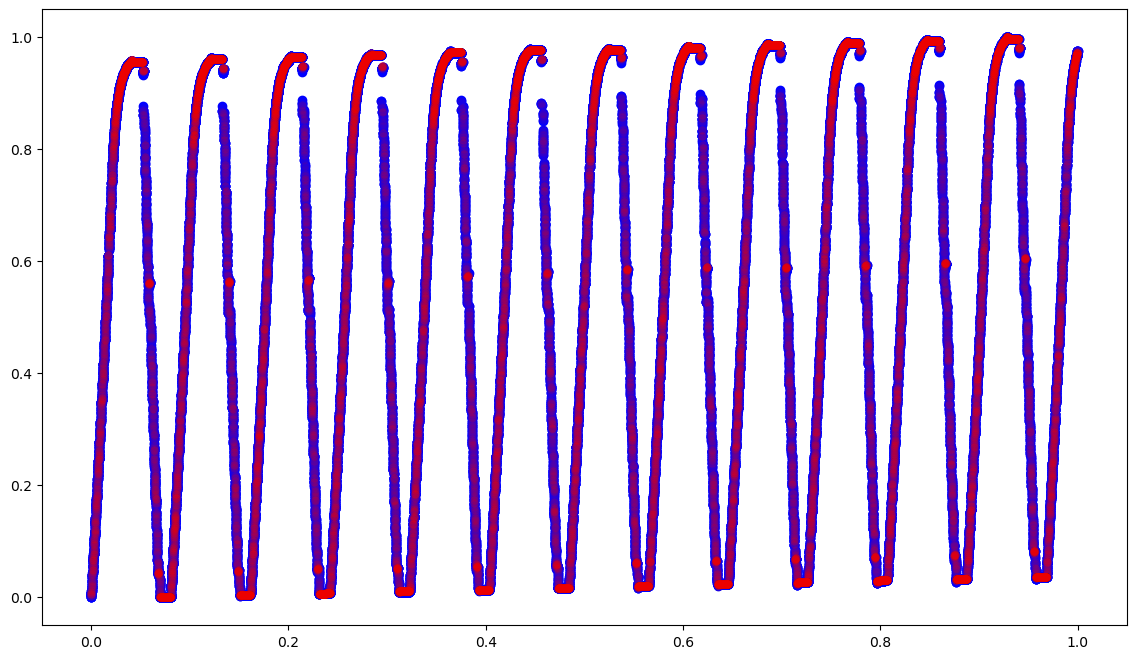

In [56]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [57]:
sns.lineplot(X_test['Time'],Y_test)
sns.lineplot(x = "Time", y = "Y_test", data=X_test,Y_test)
plt.show()

SyntaxError: positional argument follows keyword argument (1385677626.py, line 2)

## Model 6

In [58]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="linear"),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0038 - rmse: 0.0262 - mae: 0.0038 - mse: 6.8833e-04 - val_loss: 9.1297e-04 - val_rmse: 0.0018 - val_mae: 9.1297e-04 - val_mse: 3.2551e-06
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 8.7820e-04 - rmse: 0.0016 - mae: 8.7820e-04 - mse: 2.5696e-06 - val_loss: 7.6628e-04 - val_rmse: 0.0015 - val_mae: 7.6628e-04 - val_mse: 2.1693e-06
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 7.6150e-04 - rmse: 0.0014 - mae: 7.6150e-04 - mse: 1.8596e-06 - val_loss: 6.9384e-04 - val_rmse: 0.0013 - val_mae: 6.9384e-04 - val_mse: 1.6771e-06
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 7.0691e-04 - rmse: 0.0012 - mae: 7.0691e-04 - mse: 1.5387e-06 - val_loss: 6.5628e-04 - val_rmse: 0.0012 - val_mae: 6.5628e-04 - val_mse: 1.4229e-06
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 6.6893e-04 - rmse: 0.0012 

6073/6073 [==============================] - 10s 2ms/step - loss: 5.3400e-04 - rmse: 8.5912e-04 - mae: 5.3400e-04 - mse: 7.3809e-07 - val_loss: 5.3529e-04 - val_rmse: 8.7370e-04 - val_mae: 5.3529e-04 - val_mse: 7.6334e-07
Epoch 36: early stopping
CPU times: total: 9min 42s
Wall time: 5min 52s


In [59]:
model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 10)             40        
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 10)             210       
                                                                 
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                656       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 923
Trainable params: 923
Non-trainable params: 0
_________________________________________________________________


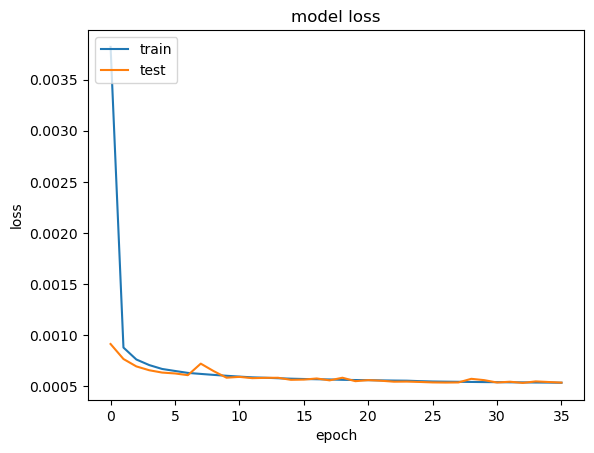

In [60]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 1s 762us/step


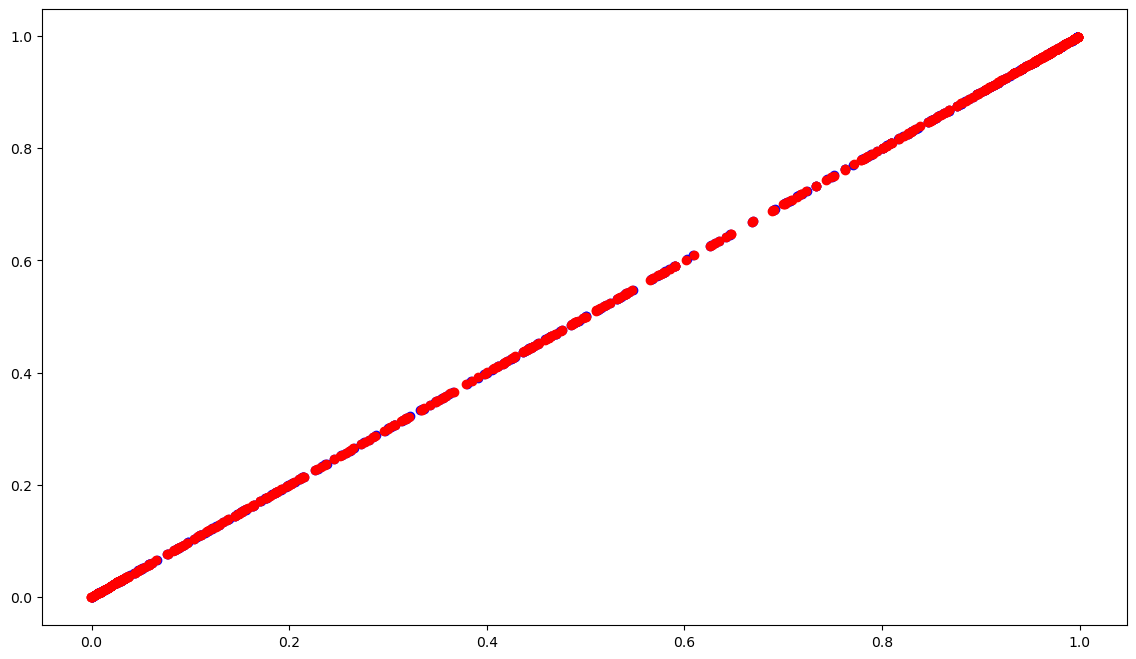

In [61]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

In [86]:
model_6.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 5.3529e-04 - rmse: 8.7370e-04 - mae: 5.3529e-04 - mse: 7.6334e-07


[0.0005352909793145955,
 0.0008736957097426057,
 0.0005352909793145955,
 7.633441896359727e-07]

## Model 7 (Best)

In [62]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(16,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation="relu"),
                               #tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_7 = model_7.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0070 - rmse: 0.0491 - mae: 0.0070 - mse: 0.0024 - val_loss: 0.0026 - val_rmse: 0.0034 - val_mae: 0.0026 - val_mse: 1.1271e-05
Epoch 2/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0014 - rmse: 0.0024 - mae: 0.0014 - mse: 5.8138e-06 - val_loss: 0.0012 - val_rmse: 0.0019 - val_mae: 0.0012 - val_mse: 3.7993e-06
Epoch 3/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0013 - rmse: 0.0018 - mae: 0.0013 - mse: 3.4020e-06 - val_loss: 9.0530e-04 - val_rmse: 0.0012 - val_mae: 9.0530e-04 - val_mse: 1.5553e-06
Epoch 4/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0012 - rmse: 0.0015 - mae: 0.0012 - mse: 2.3187e-06 - val_loss: 0.0027 - val_rmse: 0.0028 - val_mae: 0.0027 - val_mse: 8.0093e-06
Epoch 5/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0012 - rmse: 0.0015 - mae: 0.0012 - mse: 2.2427e-06 - val_loss: 8.3788e-04 -

6073/6073 [==============================] - 12s 2ms/step - loss: 8.0637e-04 - rmse: 0.0010 - mae: 8.0637e-04 - mse: 1.0874e-06 - val_loss: 9.0964e-04 - val_rmse: 0.0011 - val_mae: 9.0964e-04 - val_mse: 1.1723e-06
Epoch 39/100
6073/6073 [==============================] - 12s 2ms/step - loss: 8.2027e-04 - rmse: 0.0011 - mae: 8.2027e-04 - mse: 1.1175e-06 - val_loss: 5.7674e-04 - val_rmse: 7.0885e-04 - val_mae: 5.7674e-04 - val_mse: 5.0246e-07
Epoch 40/100
6073/6073 [==============================] - 13s 2ms/step - loss: 8.1708e-04 - rmse: 0.0011 - mae: 8.1708e-04 - mse: 1.1157e-06 - val_loss: 4.9624e-04 - val_rmse: 6.2030e-04 - val_mae: 4.9624e-04 - val_mse: 3.8477e-07
Epoch 41/100
6073/6073 [==============================] - 12s 2ms/step - loss: 7.9643e-04 - rmse: 0.0010 - mae: 7.9643e-04 - mse: 1.0745e-06 - val_loss: 0.0013 - val_rmse: 0.0014 - val_mae: 0.0013 - val_mse: 2.0002e-06
Epoch 42/100
6073/6073 [==============================] - 15s 2ms/step - loss: 7.8778e-04 - rmse: 0.0010 

6073/6073 [==============================] - 13s 2ms/step - loss: 6.6004e-04 - rmse: 8.5558e-04 - mae: 6.6004e-04 - mse: 7.3202e-07 - val_loss: 9.3699e-04 - val_rmse: 0.0010 - val_mae: 9.3699e-04 - val_mse: 1.0894e-06
Epoch 74/100
6073/6073 [==============================] - 13s 2ms/step - loss: 6.7377e-04 - rmse: 8.6611e-04 - mae: 6.7377e-04 - mse: 7.5015e-07 - val_loss: 6.0684e-04 - val_rmse: 7.3426e-04 - val_mae: 6.0684e-04 - val_mse: 5.3913e-07
Epoch 75/100
6073/6073 [==============================] - 13s 2ms/step - loss: 6.8349e-04 - rmse: 8.8505e-04 - mae: 6.8349e-04 - mse: 7.8332e-07 - val_loss: 5.4225e-04 - val_rmse: 6.1967e-04 - val_mae: 5.4225e-04 - val_mse: 3.8399e-07
Epoch 76/100
6073/6073 [==============================] - 13s 2ms/step - loss: 6.5082e-04 - rmse: 8.4695e-04 - mae: 6.5082e-04 - mse: 7.1732e-07 - val_loss: 8.9015e-04 - val_rmse: 0.0010 - val_mae: 8.9015e-04 - val_mse: 1.0259e-06
Epoch 77/100
6073/6073 [==============================] - 13s 2ms/step - loss: 6.

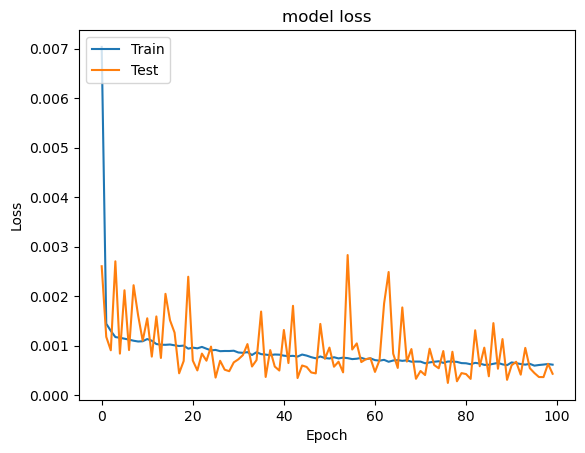

In [63]:
plot_his(history_7)

1519/1519 [==============================] - 2s 1ms/step


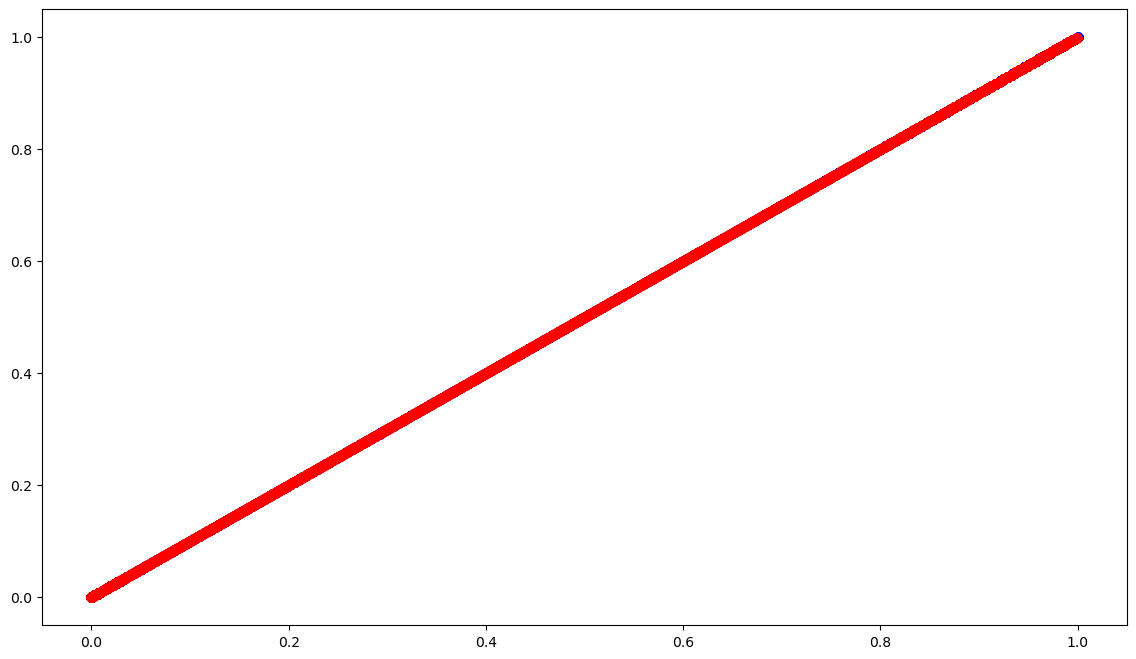

In [64]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

In [65]:
model_7.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 4.3103e-04 - rmse: 5.0353e-04 - mae: 4.3103e-04 - mse: 2.5354e-07


[0.0004310341610107571,
 0.0005035325302742422,
 0.0004310341610107571,
 2.535449823426461e-07]

## Model 8 (Best)

In [66]:
%%time
model_8 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(7,1)),
                               tf.keras.layers.Conv1D(8,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_8 = model_8.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0057 - rmse: 0.0354 - mae: 0.0057 - mse: 0.0013 - val_loss: 0.0021 - val_rmse: 0.0031 - val_mae: 0.0021 - val_mse: 9.3571e-06
Epoch 2/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0019 - rmse: 0.0026 - mae: 0.0019 - mse: 6.8303e-06 - val_loss: 0.0021 - val_rmse: 0.0026 - val_mae: 0.0021 - val_mse: 6.6459e-06
Epoch 3/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0014 - rmse: 0.0019 - mae: 0.0014 - mse: 3.7195e-06 - val_loss: 0.0010 - val_rmse: 0.0014 - val_mae: 0.0010 - val_mse: 1.8726e-06
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.2485e-06 - val_loss: 0.0011 - val_rmse: 0.0014 - val_mae: 0.0011 - val_mse: 1.9300e-06
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0010 - rmse: 0.0013 - mae: 0.0010 - mse: 1.8084e-06 - val_loss: 9.3584e-04 - val_rms

Epoch 37/100
6073/6073 [==============================] - 10s 2ms/step - loss: 5.4400e-04 - rmse: 7.9241e-04 - mae: 5.4400e-04 - mse: 6.2791e-07 - val_loss: 5.8264e-04 - val_rmse: 8.2582e-04 - val_mae: 5.8264e-04 - val_mse: 6.8198e-07
Epoch 38/100
6073/6073 [==============================] - 10s 2ms/step - loss: 5.4118e-04 - rmse: 7.8929e-04 - mae: 5.4118e-04 - mse: 6.2297e-07 - val_loss: 7.5809e-04 - val_rmse: 9.7590e-04 - val_mae: 7.5809e-04 - val_mse: 9.5238e-07
Epoch 39/100
6073/6073 [==============================] - 10s 2ms/step - loss: 5.3463e-04 - rmse: 7.8209e-04 - mae: 5.3463e-04 - mse: 6.1166e-07 - val_loss: 5.2255e-04 - val_rmse: 7.6428e-04 - val_mae: 5.2255e-04 - val_mse: 5.8413e-07
Epoch 40/100
6073/6073 [==============================] - 10s 2ms/step - loss: 5.3806e-04 - rmse: 7.8444e-04 - mae: 5.3806e-04 - mse: 6.1534e-07 - val_loss: 4.8832e-04 - val_rmse: 7.5012e-04 - val_mae: 4.8832e-04 - val_mse: 5.6268e-07
Epoch 41/100
6073/6073 [==============================] - 10

Epoch 72/100
6073/6073 [==============================] - 10s 2ms/step - loss: 4.6165e-04 - rmse: 7.0292e-04 - mae: 4.6165e-04 - mse: 4.9409e-07 - val_loss: 4.4491e-04 - val_rmse: 6.9194e-04 - val_mae: 4.4491e-04 - val_mse: 4.7878e-07
Epoch 73/100
6073/6073 [==============================] - 10s 2ms/step - loss: 4.5840e-04 - rmse: 6.9926e-04 - mae: 4.5840e-04 - mse: 4.8896e-07 - val_loss: 4.3166e-04 - val_rmse: 6.7772e-04 - val_mae: 4.3166e-04 - val_mse: 4.5930e-07
Epoch 74/100
6073/6073 [==============================] - 11s 2ms/step - loss: 4.5908e-04 - rmse: 6.9993e-04 - mae: 4.5908e-04 - mse: 4.8990e-07 - val_loss: 4.4402e-04 - val_rmse: 6.8980e-04 - val_mae: 4.4402e-04 - val_mse: 4.7582e-07
Epoch 75/100
6073/6073 [==============================] - 11s 2ms/step - loss: 4.5698e-04 - rmse: 6.9792e-04 - mae: 4.5698e-04 - mse: 4.8710e-07 - val_loss: 4.2540e-04 - val_rmse: 6.7211e-04 - val_mae: 4.2540e-04 - val_mse: 4.5174e-07
Epoch 76/100
6073/6073 [==============================] - 10

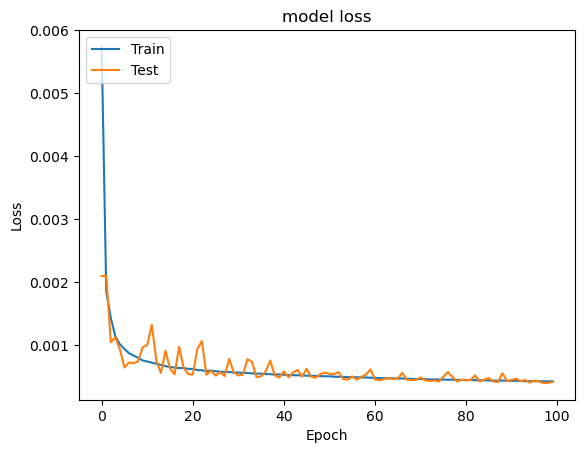

In [67]:
plot_his(history_8)

In [68]:
model_8.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 4.1797e-04 - rmse: 6.5379e-04 - mae: 4.1797e-04 - mse: 4.2744e-07


[0.00041797186713665724,
 0.0006537906010635197,
 0.00041797186713665724,
 4.274421598893241e-07]

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['SOC'])
plt.plot(X_test['Time'],Y_test,color='blue')
plt.plot(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
#Draw threshold
#plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('SOC')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Trial Dataset')

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [69]:
from sklearn.svm import SVR, LinearSVR

In [70]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [71]:
y_pred_svr = svr.predict(X)

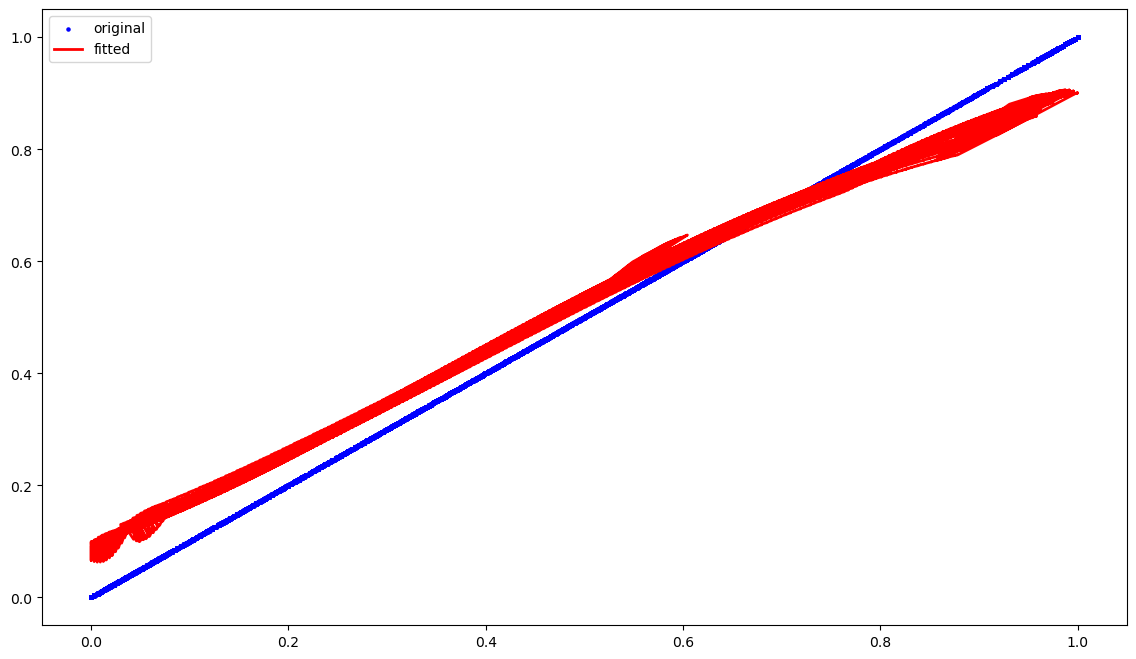

In [72]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

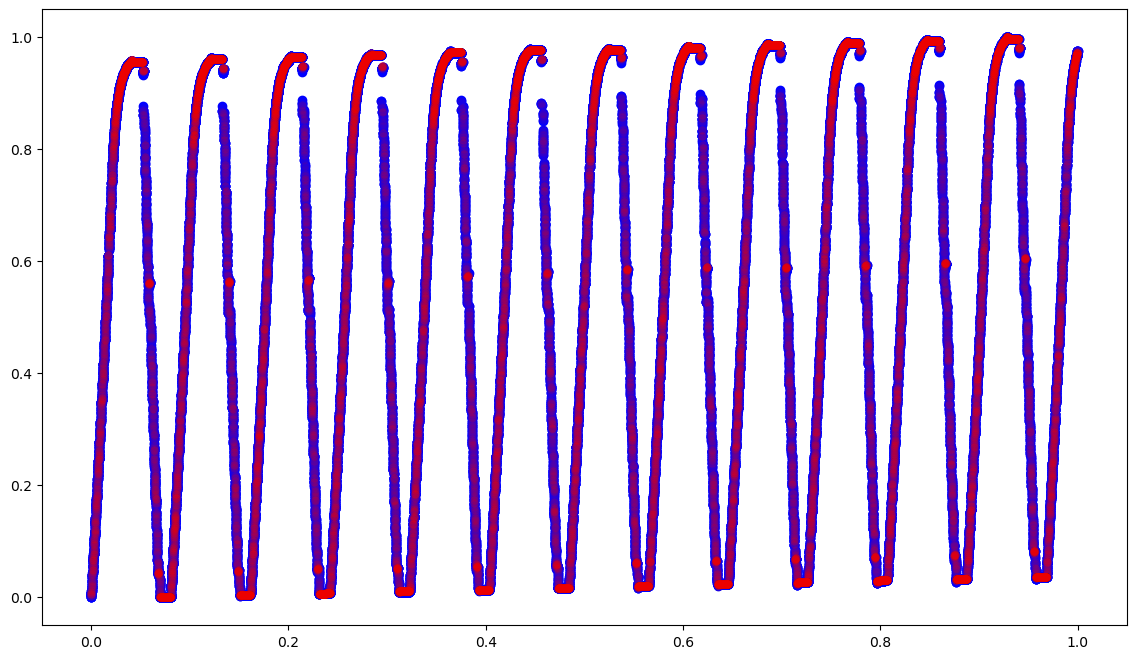

In [73]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.9717909525033425
MSE: 0.003900052487859568


In [75]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.9543716026370487
For Kernel rbf
Accuracy is : 0.9718689638298755


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [78]:
rf.score(X_test,Y_test)

0.999999961982943

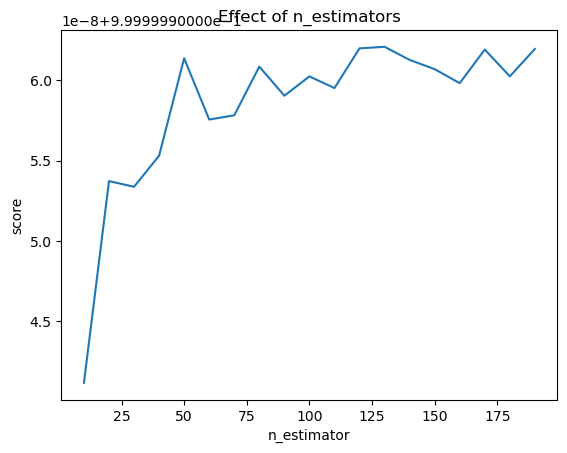

In [79]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [80]:
for i in scores:
  print(f"score is : {i}")

score is : 0.9999999411666068
score is : 0.999999953725889
score is : 0.9999999533714125
score is : 0.9999999553075551
score is : 0.9999999613778597
score is : 0.9999999575595312
score is : 0.999999957822556
score is : 0.9999999608550395
score is : 0.9999999590433247
score is : 0.9999999602450117
score is : 0.9999999595180767
score is : 0.9999999619917652
score is : 0.999999962090204
score is : 0.9999999612746441
score is : 0.9999999606966962
score is : 0.9999999598237264
score is : 0.9999999619169055
score is : 0.9999999602497166
score is : 0.9999999619534863


In [81]:
print("hj")

hj


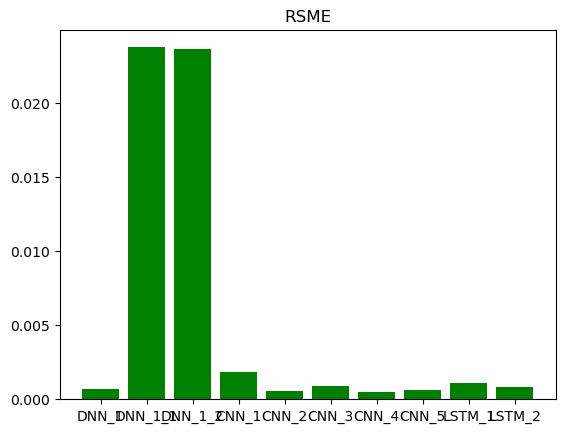

In [93]:


rmse_score = {'DNN_1':0.0006928,'DNN_1_1':0.0237752,'DNN_1_2':0.02365463,'CNN_1':0.00186902,'CNN_2':0.00056235,
              'CNN_3':0.00087369,'CNN_4':0.00050353,'CNN_5':0.00065379,'LSTM_1':0.0010734,
             'LSTM_2':0.00085671}
names = list(rmse_score.keys())
values = list(rmse_score.values())



plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RSME')
plt.show()

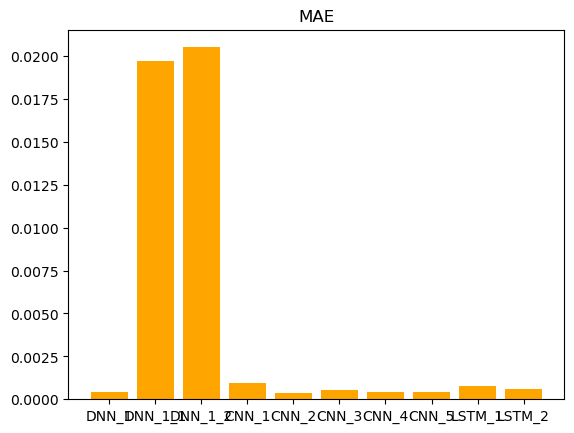

In [94]:
mae_score = {'DNN_1':0.0004480,'DNN_1_1':0.01971988,'DNN_1_2':0.02050883,'CNN_1':0.000936490,'CNN_2':0.00036893,
              'CNN_3':0.0005352,'CNN_4':0.0004310,'CNN_5':0.0004179,'LSTM_1':0.0007953,
             'LSTM_2':0.0005844}

names_mae = list(mae_score.keys())
values_mae = list(mae_score.values())

plt.bar(range(len(mae_score)), values_mae, tick_label=names_mae,color='orange')
plt.title('MAE')
plt.show()